In [2]:
#Import cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = "/Users/brewaterman/Desktop/gwlevels706.txt"
df = pd.read_csv(data, sep = "\t", comment = "#")
df.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,5s,15s,6s,10d,5d,5s,12s,12s,10s,1s,5s,1s,1s,1s,1s,1s
1,USGS,390828096454706,GW,2005-11-16,13:20,CST,NaN,1144.68,NGVD29,NaN,USGS,m,2,S,T,A
2,USGS,390828096454706,GW,2006-03-15,11:10,CST,NaN,1144.31,NGVD29,NaN,USGS,m,2,S,T,A
3,USGS,390828096454706,GW,2006-07-05,10:15,CDT,NaN,1143.99,NGVD29,NaN,USGS,m,2,S,T,A
4,USGS,390828096454706,GW,2006-10-16,10:30,CDT,NaN,1143.27,NGVD29,NaN,USGS,m,2,S,T,A


In [4]:
#pulling out neccessary columns
datawith0 = df[["site_no", "lev_dt", "sl_lev_va", "sl_datum_cd"]]
wellData = datawith0.drop(0)
wellData.head(5)
#wellData.info()
#datawith0

,site_no,lev_dt,sl_lev_va,sl_datum_cd
1,390828096454706,2005-11-16,1144.68,NGVD29
2,390828096454706,2006-03-15,1144.31,NGVD29
3,390828096454706,2006-07-05,1143.99,NGVD29
4,390828096454706,2006-10-16,1143.27,NGVD29
5,390828096454706,2006-12-21,1143.37,NGVD29


In [5]:
#Convert data to types 
wellData = wellData.astype({"sl_lev_va": float})
                       #"lev_dt": float})

In [6]:
#Level dates switches to years 
dates = pd.to_datetime(wellData["lev_dt"])
years = dates.dt.year

#add as col in df
wellData["Years"] = years
wellData.head()

,site_no,lev_dt,sl_lev_va,sl_datum_cd,Years
1,390828096454706,2005-11-16,1144.68,NGVD29,2005
2,390828096454706,2006-03-15,1144.31,NGVD29,2006
3,390828096454706,2006-07-05,1143.99,NGVD29,2006
4,390828096454706,2006-10-16,1143.27,NGVD29,2006
5,390828096454706,2006-12-21,1143.37,NGVD29,2006


In [7]:
#number of years active for well
yearsactive = years.unique() #.tolist()
yearsactive.size

15

In [8]:
yearsCalc = wellData.groupby('Years')
#yearsCalc.mean()
yearsCalc.agg(['count', 'min', 'max', 'std', 'mean']).head(15)

sl_lev_va                                         
          count      min      max       std         mean
Years                                                   
2005          1  1144.68  1144.68       NaN  1144.680000
2006          4  1143.27  1144.31  0.498364  1143.735000
2007          5  1144.35  1151.02  2.854377  1145.932000
2008          6  1147.37  1153.77  2.454715  1149.846667
2009          7  1145.68  1149.95  1.853478  1147.458571
2010          4  1145.57  1152.25  2.758180  1149.157500
2011          3  1144.44  1145.51  0.535008  1144.973333
2012          5  1143.70  1150.51  3.094846  1146.052000
2013          5  1143.73  1144.37  0.288062  1144.016000
2014          4  1144.10  1145.01  0.415090  1144.445000
2015          3  1144.20  1147.66  1.857202  1145.540000
2016          3  1145.53  1150.06  2.507914  1147.173333
2017          3  1145.03  1152.83  4.276743  1147.916667
2018          4  1144.03  1151.90  3.709115  1146.360000
2019          3  1152.48  1152.97  0.260832  1152.776667

In [9]:
averageperyear = yearsCalc['sl_lev_va'].mean().sort_values(ascending=False)
print(averageperyear)

Years
2019    1152.776667
2008    1149.846667
2010    1149.157500
2017    1147.916667
2009    1147.458571
2016    1147.173333
2018    1146.360000
2012    1146.052000
2007    1145.932000
2015    1145.540000
2011    1144.973333
2005    1144.680000
2014    1144.445000
2013    1144.016000
2006    1143.735000
Name: sl_lev_va, dtype: float64


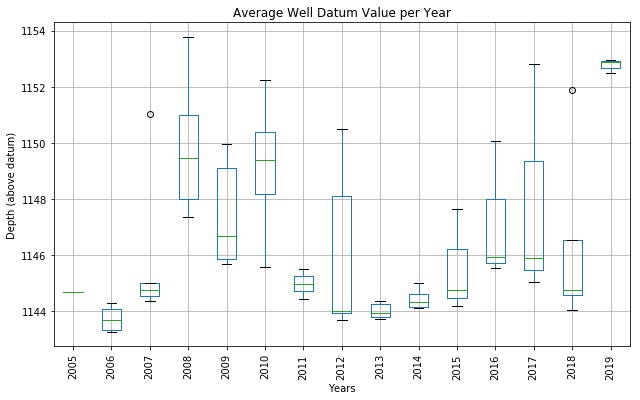

In [10]:
ax = wellData[['sl_lev_va', 'Years']].boxplot(
                by='Years', figsize=(10, 6), rot=90);
ax.set_xlabel('Years');
ax.set_ylabel('Depth (above datum)');
ax.set_title('Average Well Datum Value per Year');
plt.suptitle(''); 

#plt.savefig('gwlevels.jpg')